---
title: Summary plots of Enformer performance across genes
date: 9/13/2023
author: Sabrina Mi
output: 
  html:
    code-fold: true
---

All rat reference predictions were calculated from Enformer runs with human output along rat reference genome.

## Human Predicted vs Human Observed


In [22]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [124]:
human_brain_gex = pd.read_csv("/home/s1mi/enformer_rat_data/output/hg38_predicted_vs_observed_expression_all_GTEx_brain_tissues.csv", index_col=0).dropna()
x = human_brain_gex["cortex"].values
y = human_brain_gex["enformer"].values

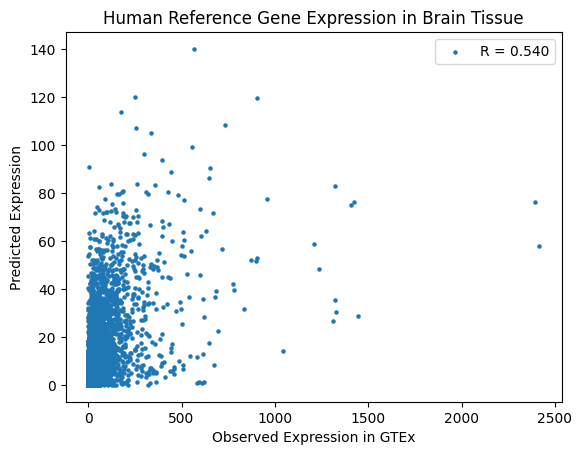

In [125]:
corr, pval = stats.pearsonr(x, y)
plt.scatter(x, y, s=5, label=f'R = {corr:.3f}')
plt.xlabel('Observed Expression in GTEx')
plt.ylabel('Predicted Expression')
plt.title("Human Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

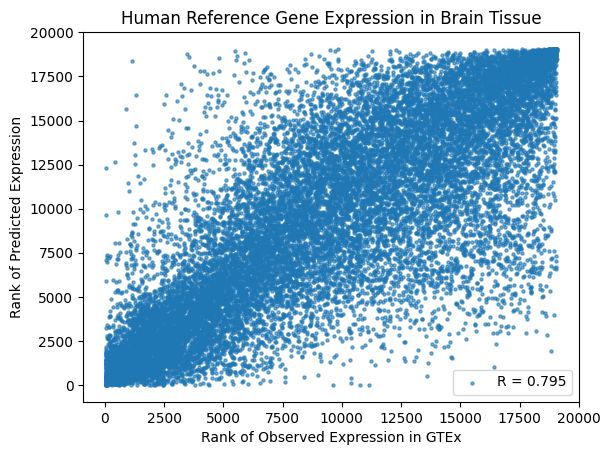

In [92]:
corr, pval = stats.spearmanr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Rank of Observed Expression in GTEx')
plt.ylabel('Rank of Predicted Expression')
plt.title("Human Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

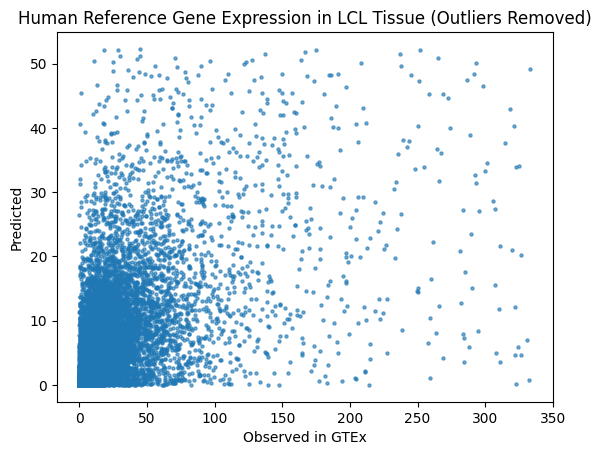

In [126]:
threshold = 5
outliers_x = stats.zscore(x) > threshold
outliers_y = stats.zscore(y) > threshold
filtered_x = x[~outliers_x & ~outliers_y]
filtered_y = y[~outliers_x & ~outliers_y]
plt.scatter(filtered_x, filtered_y, s=5, alpha=0.6, marker='o')

# Add labels and title
plt.xlabel('Observed in GTEx')
plt.ylabel('Predicted')
plt.title('Human Reference Gene Expression in LCL Tissue (Outliers Removed)')

# Show the plot
plt.show()

For extra confirmation, we replicated Huang et al's results with GEUVADIS reference gene expression in LCL tissue, and even saw improved results when we compared across all human genes.

In [65]:
human_lcl_gex = pd.read_csv("/home/s1mi/enformer_rat_data/output/hg38_predicted_vs_observed_expression_GEUVADIS.csv",index_col=0)

# Sample data for x and y (including outliers)
x = human_lcl_gex["geuvadis, mean"].values
y = human_lcl_gex["enformer, 3 bin"].values

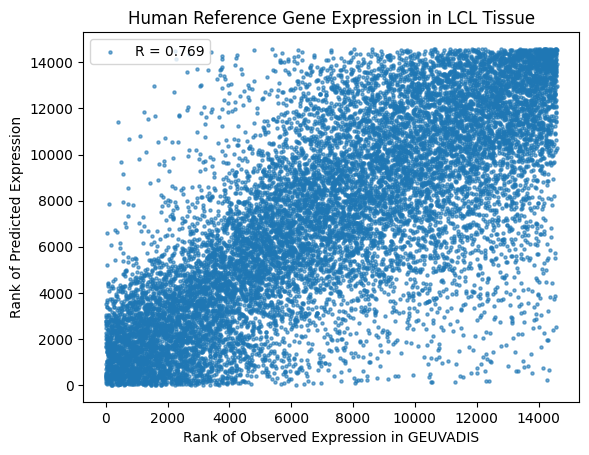

In [66]:
corr, pval = stats.spearmanr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Rank of Observed Expression in GEUVADIS')
plt.ylabel('Rank of Predicted Expression')
plt.title("Human Reference Gene Expression in LCL Tissue")
plt.legend()
plt.show()

## Rat Predicted vs Rat Observed

In [127]:
rat_brain_gex = pd.read_csv("/home/s1mi/enformer_rat_data/output/rn7_reference_predicted_vs_observed_expression.csv", index_col=0)
x = rat_brain_gex["observed"]
y = rat_brain_gex["predicted"]

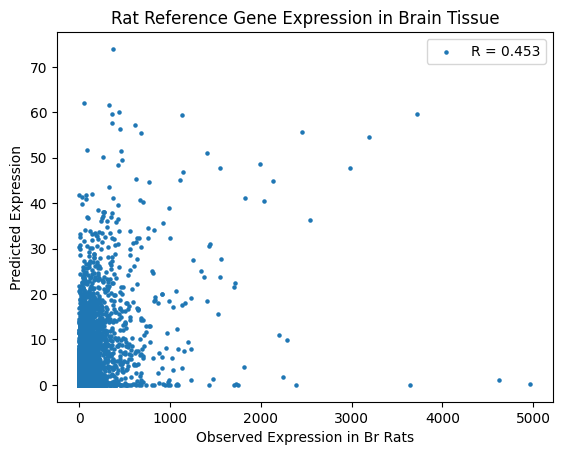

In [128]:
corr, pval = stats.pearsonr(x, y)
plt.scatter(x, y, s=5, label=f'R = {corr:.3f}')
plt.xlabel('Observed Expression in Br Rats')
plt.ylabel('Predicted Expression')
plt.title("Rat Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

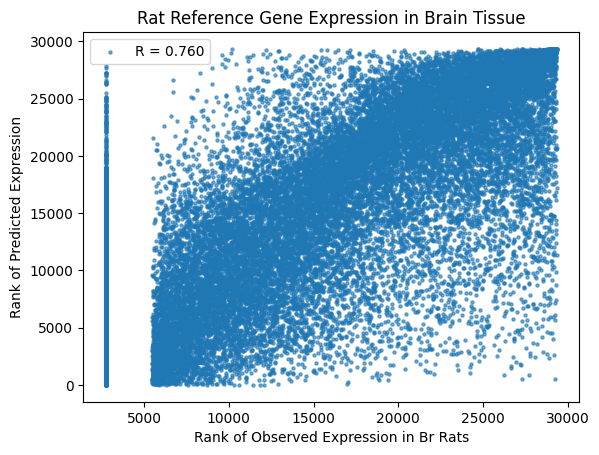

In [129]:
corr, pval = stats.spearmanr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Rank of Observed Expression in Br Rats')
plt.ylabel('Rank of Predicted Expression')
plt.title("Rat Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

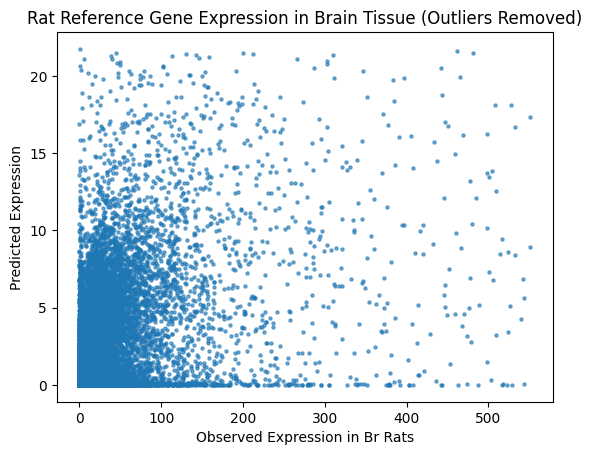

In [131]:
threshold = 5
outliers_x = stats.zscore(x) > threshold
outliers_y = stats.zscore(y) > threshold
filtered_x = x[~outliers_x & ~outliers_y]
filtered_y = y[~outliers_x & ~outliers_y]
plt.scatter(filtered_x, filtered_y, s=5, alpha=0.6, marker='o')
plt.xlabel('Observed Expression in Br Rats')
plt.ylabel('Predicted Expression')
plt.title("Rat Reference Gene Expression in Brain Tissue (Outliers Removed)")
plt.show()

## Human Observed vs Rat Observed

In [107]:
## read rat observed gene expression data
rat_tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')
rat_mean_tpm = rat_tpm.iloc[:,3:].mean(axis=1)
rat_mean_tpm.name = "rat mean tpm"
## read human gene expression data
human_tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/gene_tpm_2017-06-05_v8_brain_cortex.gct.gz", header=2, sep="\t")
human_tpm['Name'] = human_tpm['Name'].apply(lambda gene: gene.split('.')[0])
human_tpm.set_index('Name', inplace=True)
# Calculate average gene expression
human_mean_tpm = human_tpm.drop(columns=['id', 'Description']).mean(axis=1)
human_mean_tpm.name = "human mean tpm"
# Map to human genes
ortho_genes = pd.read_csv("/home/s1mi/enformer_rat_data/annotation/rn7_hg38.ortholog_genes.txt", sep = "\t", index_col="ensembl_gene_id")
merged_df = ortho_genes.join(rat_mean_tpm, how="inner")
merged_df.set_index("hsapiens_homolog_ensembl_gene", inplace=True)
expr_df = merged_df.join(human_mean_tpm).dropna()

/tmp/ipykernel_232432/2998070687.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  rat_tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')


In [108]:
x = expr_df["human mean tpm"].values.astype(float)
y = expr_df["rat mean tpm"].values.astype(float)

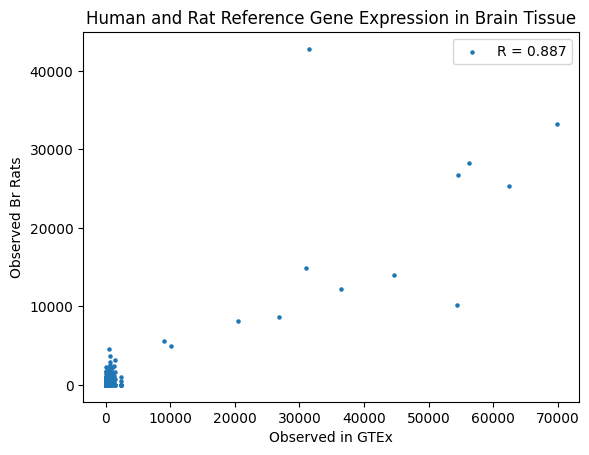

In [122]:
corr, pval = stats.pearsonr(x, y)
plt.scatter(x, y, s=5, label=f'R = {corr:.3f}')
plt.xlabel('Observed in GTEx')
plt.ylabel('Observed Br Rats')
plt.title("Human and Rat Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

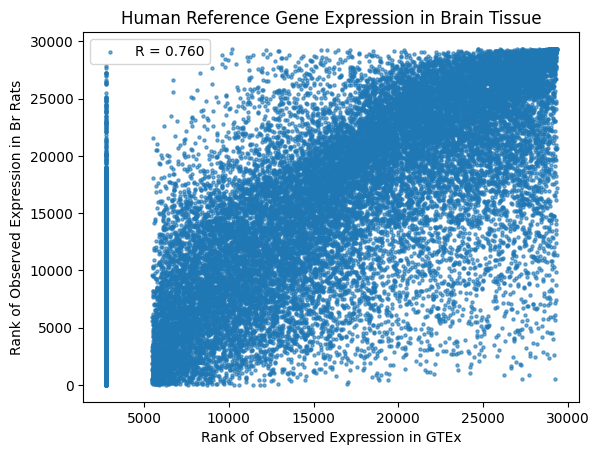

In [132]:
corr, pval = stats.spearmanr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Rank of Observed Expression in GTEx')
plt.ylabel('Rank of Observed Expression in Br Rats')
plt.title("Human Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

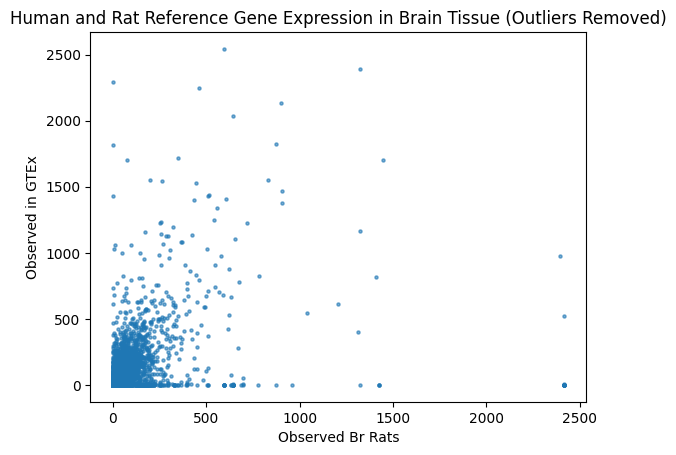

In [115]:
threshold = 5
outliers_x = stats.zscore(x) > threshold
outliers_y = stats.zscore(y) > threshold
filtered_x = x[~outliers_x & ~outliers_y]
filtered_y = y[~outliers_x & ~outliers_y]
plt.scatter(filtered_x, filtered_y, s=5, alpha=0.6, marker='o')
plt.xlabel('Observed Br Rats')
plt.ylabel('Observed in GTEx')
plt.title("Human and Rat Reference Gene Expression in Brain Tissue (Outliers Removed)")
plt.show()